In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, confusion_matrix
from sklearn.metrics import plot_roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from imblearn.base import *

ModuleNotFoundError: No module named 'sklearn'

In [131]:
import os

In [132]:
featFrame = pd.read_csv('backFeats_v3.csv',header=0)
labelFrame = pd.read_csv('labelFileBinary_v3.csv',header=0)
featFrame.head()

,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7,Feat8,Feat9,Feat10,...,Feat393,Feat394,Feat395,Feat396,Feat397,Feat398,Feat399,Feat400,Feat401,Feat402
0,142.78,139.57,136.410,133.29,130.200,127.150,124.140,121.160,118.220,115.310,...,0.016280,0.024717,0.033266,0.041384,0.048445,0.053766,0.056632,0.056343,0.052267,0.043893
1,152.94,150.78,148.640,146.52,144.410,142.320,140.240,138.180,136.120,134.070,...,-0.021758,-0.019391,-0.014964,-0.008357,0.000405,0.011123,0.023397,0.036615,0.049953,0.062388
2,102.26,100.27,98.313,96.38,94.475,92.599,90.753,88.938,87.154,85.402,...,0.014241,0.020379,0.026396,0.031841,0.036208,0.038960,0.039556,0.037492,0.032344,0.023813
3,405.24,400.55,395.890,391.26,386.650,382.060,377.490,372.950,368.430,363.940,...,-0.004801,-0.007280,-0.009650,-0.011634,-0.012920,-0.013191,-0.012149,-0.009557,-0.005278,0.000687
4,305.78,301.06,296.420,291.86,287.380,282.960,278.610,274.320,270.090,265.890,...,-0.004206,-0.006528,-0.008786,-0.010735,-0.012094,-0.012572,-0.011887,-0.009809,-0.006186,-0.000987


In [133]:
featFrame.isnull().sum()    #checking if there are missing values in the dataset

Feat1      0
Feat2      0
Feat3      0
Feat4      0
Feat5      0
          ..
Feat398    0
Feat399    0
Feat400    0
Feat401    0
Feat402    0
Length: 402, dtype: int64

In [134]:
labelFrame.head()

,SampleID
0,0
1,0
2,0
3,0
4,0


In [135]:
labelFrame.isnull().sum()

SampleID    0
dtype: int64

In [136]:
print(featFrame.shape) # 345 samples and 402 time points in each

(345, 402)


In [137]:
print(labelFrame.shape)  

(345, 1)


In [138]:
print(labelFrame.sum())      #only 65 1s samples out of 402

SampleID    65
dtype: int64


In [139]:
x_train, x_test, y_train, y_test = train_test_split(featFrame, labelFrame, test_size=0.2, random_state=101)

In [140]:
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (276, 402)
y_train : (276, 1)
x_test : (69, 402)
y_test : (69, 1)


In [103]:
rf_Model = RandomForestClassifier()
rf_Model.fit(x_train,y_train.values.ravel())

In [105]:
rf_pred = rf_Model.predict(x_test)
print (f'Train Accuracy - : {rf_Model.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Model.score(x_test,y_test):.3f}')
print(classification_report(y_test, rf_pred))
print(pd.DataFrame(confusion_matrix(y_test, rf_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

Train Accuracy - : 1.000
Test Accuracy - : 0.754
              precision    recall  f1-score   support

           0       0.76      0.98      0.86        52
           1       0.50      0.06      0.11        17

    accuracy                           0.75        69
   macro avg       0.63      0.52      0.48        69
weighted avg       0.70      0.75      0.67        69

     pred_neg  pred_pos
neg        51         1
pos        16         1


In [52]:
print(pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [107]:
#trying GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [4,6]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

In [125]:
rf_Model1 = RandomForestClassifier()   
rf_Grid1 = GridSearchCV(estimator = rf_Model1, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid1.fit(x_train, y_train.values.ravel())
print(rf_Grid1.best_params_)
print (f'Train Accuracy - : {rf_Grid1.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid1.score(x_test,y_test):.3f}')
rfg1pred = rf_Grid1.predict(x_test.values)
print(classification_report(y_test, rfg1pred))
print(pd.DataFrame(confusion_matrix(y_test, rfg1pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

Fitting 3 folds for each of 320 candidates, totalling 960 fits
{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 33}
Train Accuracy - : 0.870
Test Accuracy - : 0.739
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        52
           1       0.00      0.00      0.00        17

    accuracy                           0.74        69
   macro avg       0.38      0.49      0.42        69
weighted avg       0.57      0.74      0.64        69

     pred_neg  pred_pos
neg        44         8
pos        15         2


C:\Users\Tamer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [126]:
rf_Model2 = RandomForestClassifier(class_weight = {0:13.0, 1:69.0})    #skewing the weight in 1's favor
rf_Grid2 = GridSearchCV(estimator = rf_Model2, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid2.fit(x_train, y_train.values.ravel())
print(rf_Grid2.best_params_)
print (f'Train Accuracy - : {rf_Grid2.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid2.score(x_test,y_test):.3f}')
rfg2pred = rf_Grid2.predict(x_test.values)
print(classification_report(y_test, rfg2pred))
print(pd.DataFrame(confusion_matrix(y_test, rfg2pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

Fitting 3 folds for each of 320 candidates, totalling 960 fits
{'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}
Train Accuracy - : 0.931
Test Accuracy - : 0.652
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        52
           1       0.27      0.24      0.25        17

    accuracy                           0.65        69
   macro avg       0.51      0.51      0.51        69
weighted avg       0.64      0.65      0.64        69

     pred_neg  pred_pos
neg        41        11
pos        13         4


C:\Users\Tamer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [127]:
#trying a normal forest without GridSearchCV but with skewing the weights (intensely)
rf_Model3 = RandomForestClassifier(class_weight =  {0:1.0, 1:1000.0})
rf_Model3.fit(x_train,y_train.values.ravel())
print (f'Train Accuracy - : {rf_Model3.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Model3.score(x_test,y_test):.3f}')
rf3pred = rf_Model3.predict(x_test.values)
print(classification_report(y_test, rf3pred))
print(pd.DataFrame(confusion_matrix(y_test, rf3pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

Train Accuracy - : 1.000
Test Accuracy - : 0.710
              precision    recall  f1-score   support

           0       0.74      0.94      0.83        52
           1       0.00      0.00      0.00        17

    accuracy                           0.71        69
   macro avg       0.37      0.47      0.42        69
weighted avg       0.56      0.71      0.63        69

     pred_neg  pred_pos
neg        49         3
pos        17         0


C:\Users\Tamer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [141]:
#trying decision trees
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train.values.ravel())
print (f'Train Accuracy - : {DT.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {DT.score(x_test,y_test):.3f}')
DTpred = DT.predict(x_test.values)
print(classification_report(y_test, DTpred))
print(pd.DataFrame(confusion_matrix(y_test, DTpred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

Train Accuracy - : 1.000
Test Accuracy - : 0.638
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        52
           1       0.25      0.24      0.24        17

    accuracy                           0.64        69
   macro avg       0.50      0.50      0.50        69
weighted avg       0.63      0.64      0.63        69

     pred_neg  pred_pos
neg        40        12
pos        13         4


C:\Users\Tamer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [142]:
#trying new feature space: the 7 features Austin used
newFeats = pd.read_csv('featsAustUsed.csv',header=0)
newLabels = pd.read_csv('finalLabels.csv',header=0)
newFeats.head()

,Feat1,Feat2,Feat3,Feat4,Feat5,Feat6,Feat7
0,33.884000,-0.084884,80.3,179.08,-1580.7,4.2,72.992
1,0.089601,-0.026476,67.1,567.25,-2845.7,1.2,60.802
2,0.158980,-0.044532,66.6,604.80,-3672.8,1.4,60.269
3,0.204950,-0.057763,64.8,719.65,-2962.7,1.4,58.742
4,0.196400,-0.056179,62.1,661.12,-3459.3,1.5,56.168


In [143]:
newFeats.isnull().sum()    #checking if there are missing values in the dataset

Feat1    0
Feat2    0
Feat3    0
Feat4    0
Feat5    0
Feat6    0
Feat7    0
dtype: int64

In [147]:
print(newLabels.sum())      #only 104 1s samples out of 328

SampleID    104
dtype: int64


In [148]:
print(newFeats.shape) # 328 samples and 7 time points in each

(328, 7)


In [150]:
x1_train, x1_test, y1_train, y1_test = train_test_split(newFeats, newLabels, test_size=0.2, random_state=101)
print(f'x1_train : {x1_train.shape}')
print(f'y1_train : {y1_train.shape}')
print(f'x1_test : {x1_test.shape}')
print(f'y1_test : {y1_test.shape}')
rf4 = RandomForestClassifier()
rf4.fit(x1_train, y1_train.values.ravel())

x1_train : (262, 7)
y1_train : (262, 1)
x1_test : (66, 7)
y1_test : (66, 1)


RandomForestClassifier()

In [151]:
rf4pred = rf4.predict(x1_test)
print (f'Train Accuracy - : {rf4.score(x1_train,y1_train):.3f}')
print (f'Test Accuracy - : {rf4.score(x1_test,y1_test):.3f}')
print(classification_report(y1_test, rf4pred))
print(pd.DataFrame(confusion_matrix(y1_test, rf4pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

Train Accuracy - : 1.000
Test Accuracy - : 0.985
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.94      1.00      0.97        16

    accuracy                           0.98        66
   macro avg       0.97      0.99      0.98        66
weighted avg       0.99      0.98      0.99        66

     pred_neg  pred_pos
neg        49         1
pos         0        16


In [158]:
#trying GSCV with it. 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [4,6]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

rfg3 = GridSearchCV(estimator = rf4, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)
rfg3.fit(x1_train, y1_train.values.ravel())
print(rfg3.best_params_)
print (f'Train Set Accuracy - : {rfg3.score(x1_train,y1_train):.3f}')
print (f'Test Set Accuracy - : {rfg3.score(x1_test,y1_test):.3f}')
rfg3pred = rfg3.predict(x1_test.values)
print(classification_report(y1_test, rfg3pred))
print(pd.DataFrame(confusion_matrix(y1_test, rfg3pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 6], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
{'bootstrap': False, 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 17}
Train Set Accuracy - : 1.000
Test Set Accuracy - : 0.985
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.94      1.00      0.97        16

    accuracy                           0.98        66
   macro avg       0.97      0.99      0.98        66
weighted avg       0.99      0.98      0.99        66

     pred_neg  pred_pos
neg        49         1
pos         0        16


C:\Users\Tamer\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [162]:
rfg3.classes_

array([0, 1], dtype=int64)

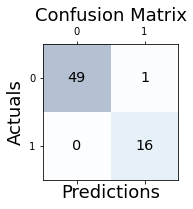

In [171]:
conf_matrix = confusion_matrix(y1_test, rfg3pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='x-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [169]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfg3, x1_test, y1_test.values.ravel(), cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
0.92 accuracy with a standard deviation of 0.07


In [173]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfg3, x1_test, y1_test.values.ravel(), cv=10)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Fitting 5 folds for each of 320 candidates, totalling 1600 fits
0.99 accuracy with a standard deviation of 0.04
